## Лабораторная работа 6

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
from ipywidgets import interact

In [2]:
def Plot(count, points_xy):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    colors = sns.color_palette("tab10")

    for i in range(count):
            for j, xy in enumerate(points_xy[i][:-1]):
                try:
                    lbl = xy[2]
                except:
                    lbl = '.'
                ax.plot(xy[0], xy[1], color = colors[i % len(colors)], label = lbl + ' ' + points_xy[i][-1])
                ax.legend()
    plt.subplots_adjust(hspace=0.5)

#TRIDIAGONAL_MATRIX_ALGORITHM

class Tridiagonal_Matrix_Algorithm:
    def __init__(self, A, _d):
        self.n = len(_d)
        self.a = []
        self.b = []
        self.c = []
        self.d = _d
        self.A = A

        self.a.append(0);
        self.b.append(self.A[0][0])
        self.c.append(self.A[0][1])
        for i in range(1, self.n - 1):
            self.a.append(self.A[i][i - 1])
            self.b.append(self.A[i][i])
            self.c.append(self.A[i][i + 1])

        self.a.append(self.A[self.n - 1][self.n - 2])
        self.b.append(self.A[self.n - 1][self.n - 1])
        self.c.append(0)

        self.Make_P_andQ()
        self.x = self.Make_x()

    def Ans(self):
        return self.x

    def Make_P_andQ(self):
        self.p = []
        self.q = []
        self.p.append(- self.c[0] / self.b[0])
        self.q.append(self.d[0] / self.b[0])

        for i in range(1, self.n - 1):
           self.p.append(- self.c[i] / (self.b[i] + self.a[i] * self.p[i - 1]))
           self.q.append((self.d[i] - self.a[i] * self.q[i - 1]) / (self.b[i] + self.a[i] * self.p[i - 1]))

    def Make_x(self):
        self.ans = np.zeros(self.n)

        self.ans[self.n - 1] = (self.d[self.n - 1] - self.a[self.n - 1] * self.q[self.n - 2]) / (self.b[self.n - 1] + self.a[self.n - 1] * self.p[self.n - 2]);

        for i in range(self.n - 2, -1, -1):
            self.ans[i] = self.p[i] * self.ans[i + 1] + self.q[i]

        return self.ans.tolist()

вар 4
$$
\frac{\partial^{2}{u}}{\partial{t^2}} + d \frac{\partial{u}}{\partial{t}} =  a \frac{\partial^2{u}}{\partial{x^2}} + b \frac{\partial{u}}{\partial{x}} + cu$$

$$ \alpha_0 * \frac{\partial{u}}{\partial{x}}(0) + \beta_0 * u_0  = \gamma_0(t^{k + 1})$$
$$ \alpha_l * \frac{\partial{u}}{\partial{x}}(l) + \beta_l * u_n = \gamma_l(t^{k + 1})$$

$$
\frac{\partial^{2}{u}}{\partial{t^2}} + 2 * \frac{\partial{u}}{\partial{t}} = \frac{\partial^2{u}}{\partial{x^2}} + 2 * \frac{\partial{u}}{\partial{x}} + (-3) * u
$$
$$  a > 0, b > 0, c < 0 $$
$$ u(0, t)= 0 $$
$$ u(pi, t)  = 0 $$
$$ u(x, 0) = 0 $$
$$ u_t(x, 0) = 2 * exp(-x) * sin(x) $$

$$ Аналитическое \  решение: U(x, t) = exp(-t-x)sin(x)sin(t) $$

In [3]:
a = 1
b = 2
c = -3
d = 2
f = lambda x, t : 0
l = math.pi

alph_0 = 0
beta_0 = 1
gamma_0 = lambda t: 0

alph_l = 0
beta_l = 1
gamma_l = lambda t: 0

Psi_1 = lambda x: 0
Psi_2 = lambda x: 2 * math.exp(-x) * math.sin(x)

solution = lambda x, t: math.exp(-t - x) * math.sin(x) * math.sin(2 * t)

# a = 1
# b = 1
# c = -1
# d = 3
# f = lambda u, t : -math.cos(u) * math.exp(-t) 
# l = math.pi

# alph_0 = 0
# beta_0 = 1
# gamma_0 = lambda t: 0

# alph_l = 0
# beta_l = 1
# gamma_l = lambda t: 0

# Psi_1 = lambda x: 0
# Psi_2 = lambda x: 2 * math.exp(-x) * math.sin(x)

# solution = lambda x, t: math.exp(-t - x) * math.sin(x) * math.sin(2 * t)



# 2Т1П

In [4]:
class Two_point_first_order:
    def __init__(self, a, b, c, d, f, crnt = 1/4):
        self.a = a
        self.b = b
        self.c = c
        self.d = d
        self.f = f
        self.crnt = crnt
    
    def Explicit(self, alph_0, alph_l, beta_0, beta_l, gamma_0, gamma_l, Psi_1, Psi_2, l, T = 4, n = 50):
        h = l / n
        tau =  self.crnt * h**2 / self.a
        self.tau = tau
        x = np.arange(0, l, h)
        self.x = x

        u_0 = [Psi_1(x) for x in self.x]
        u_1 = [Psi_2(x) * tau + Psi_1(x) for x in self.x]
        _U = [u_0, u_1]
        t = tau
        while (t < T):
            t += tau
            _u = np.zeros(len(u_0))
            u_k = _U[-1]
            u_pred_k = _U[-2]
            for i in range(1, len(_u) - 1):
                right_part = self.a**2 * (u_k[i + 1] - 2 * u_k[i] + u_k[i - 1]) / (h * h) + self.b * (u_k[i + 1] - u_k[i - 1]) / (2 * h) + self.c * u_k[i] + self.f(u_k[i], t)
                _u[i] = (right_part * 2 * tau**2 + u_pred_k[i] * (self.d * tau - 2) + 4 * u_k[i]) / (2 + self.d * tau)
            _u[0] = (h * gamma_0(t) - alph_0 * _u[1]) / (h * beta_0 - alph_0)
            _u[-1] = (h * gamma_l(t) + alph_l * _u[-2]) / (h * beta_l + alph_l)
            _U.append(_u)
        return _U

    def Implicit(self, alph_0, alph_l, beta_0, beta_l, gamma_0, gamma_l, Psi_1, Psi_2, l, T = 4, n = 50):
        h = l / n
        tau =  self.crnt * h**2 / self.a
        self.tau = tau
        x = np.arange(0, l, h)
        self.x = x

        u_0 = [Psi_1(x) for x in self.x]
        u_1 = [Psi_2(x) * tau + Psi_1(x) for x in self.x]

        _U = [u_0, u_1]
        t = tau
        while (t < T):
            t += tau

            A = np.zeros((n, n))
            d = np.zeros(n)

            i = 0
            for row in A[1:-1]:
                row[i] = self.a**2 * 2 * tau**2 -  self.b * h * tau**2
                row[i + 1] = -4 * self.a**2 * tau**2 + self.c * 2 * tau**2 * h**2 - 2 * h**2 - self.d * tau * h**2
                row[i + 2] = self.a**2 * 2 * tau**2 + self.b * h * tau**2
                i += 1

                d[i] = 2 * h**2 * (_U[-2][i] - 2 * _U[-1][i]) + self.d * tau * h**2 * (-_U[-2][i]) - 2 * h**2 * tau**2 * self.f(_U[-1][i], t)
                
            A[0][0] = -alph_0 /  h + beta_0
            A[0][1] = alph_0 / h
            d[0] = gamma_0(t)
            
            A[-1][-2] = - alph_l /  h
            A[-1][-1] = alph_l / h  + beta_l
            d[-1] = gamma_l(t)
            
            tr = Tridiagonal_Matrix_Algorithm(A, d)
            u = tr.Ans()
            _U.append(u)
        return _U

    def Get_real_vals(self, f, appr_U):
        U = []
        for i, u_appr in enumerate(appr_U):
            U.append([f(_x, self.tau * i) for _x in self.x])
        return U
    
    def Get_epx(self, U_appr, U_real):
        eps = [max(abs(np.array(U_real[i]) - np.array(U_appr[i]))) for i in range(len(U_appr))]
        return eps


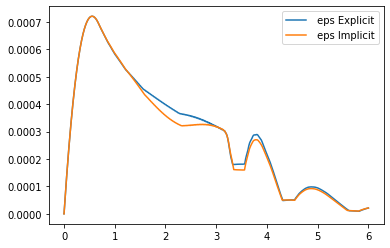

In [5]:
met_2T1P = Two_point_first_order(a, b, c, d, f)

ex_U21_appr = met_2T1P.Explicit(alph_0, alph_l, beta_0, beta_l, gamma_0, gamma_l, Psi_1, Psi_2, l, T = 6, n = 100)
ex_U21_real = met_2T1P.Get_real_vals(solution, ex_U21_appr)
ex_eps21 = met_2T1P.Get_epx(ex_U21_appr, ex_U21_real)

im_U21_appr = met_2T1P.Implicit(alph_0, alph_l, beta_0, beta_l, gamma_0, gamma_l, Psi_1, Psi_2, l, T = 6, n = 100)
im_U21_real = met_2T1P.Get_real_vals(solution, im_U21_appr)
im_eps21 = met_2T1P.Get_epx(im_U21_appr, im_U21_real)


data = []  
data.append([[[met_2T1P.tau * i for i in range(len(ex_U21_appr))], ex_eps21, f' eps'], f'Explicit'])
data.append([[[met_2T1P.tau * i for i in range(len(im_U21_appr))], im_eps21, f' eps'], f'Implicit'])

Plot(len(data), data)

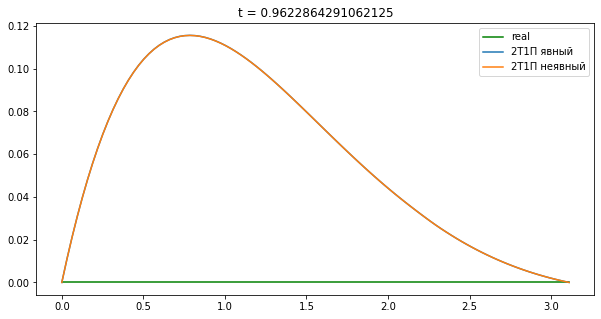

In [19]:
%matplotlib inline

U_real = [ex_U21_real, im_U21_real]
U_appr = [ex_U21_appr, im_U21_appr]


# def plot_met_2_1(i=0):
#     fig = plt.figure()
#     ax = fig.add_subplot(1, 1, 1)
#     fig.set_figwidth(10)
#     fig.set_figheight(5)

#     colors = sns.color_palette("tab10")
#     labls = ['явный', 'неявный']
    
#     ax.plot(met_2T1P.x, U_real[0][0], 'g', label = 'real');
    
#     for j in range(2 if len(U_real) > 2 else len(U_real)):
#         ax.plot(met_2T1P.x, U_appr[j][i], label = '2Т1П ' + labls[j], color = colors[j % len(colors)]);
#         ax.set_title(f"t = {met_2T1P.tau * i}")
#         ax.legend()


#     plt.show();
    
# interact(plot_met_2_1, i = (0, len(U_appr[0]) - 100, 100));
i = 3900
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_figwidth(10)
fig.set_figheight(5)

colors = sns.color_palette("tab10")
labls = ['явный', 'неявный']

ax.plot(met_2T1P.x, U_real[0][0], 'g', label = 'real');

for j in range(2 if len(U_real) > 2 else len(U_real)):
    ax.plot(met_2T1P.x, U_appr[j][i], label = '2Т1П ' + labls[j], color = colors[j % len(colors)]);
    ax.set_title(f"t = {met_2T1P.tau * i}")
    ax.legend()


plt.show();

# 3T2П

In [7]:
class Three_point_second_order:
    def __init__(self, a, b, c, d, f, crnt = 1/4):
        self.a = a
        self.b = b
        self.c = c
        self.d = d
        self.f = f
        self.crnt = crnt
    
    def Explicit(self, alph_0, alph_l, beta_0, beta_l, gamma_0, gamma_l, Psi_1, Psi_2, l, T = 4, n = 50):
        h = l / n
        tau =  self.crnt * h**2 / self.a
        self.tau = tau
        x = np.arange(0, l, h)
        self.x = x

        u_0 = [Psi_1(x) for x in x]
        u_1 = [Psi_2(x) * tau + Psi_1(x) for x in x]
        _U = [u_0, u_1]

        t = tau
        while (t < T):
            t += tau
            _u = np.zeros(len(u_0))
            u_k = _U[-1]
            u_pred_k = _U[-2]
            for i in range(1, len(_u) - 1):
                right_part = self.a*self.a * (u_k[i + 1] - 2 * u_k[i] + u_k[i - 1]) / (h * h) + self.b * (u_k[i + 1] - u_k[i - 1]) / (2 * h) + self.c * u_k[i]
                _u[i] = (right_part * 2 * tau**2 + u_pred_k[i] * (self.d * tau - 2) + 4 * u_k[i]) / (2 + self.d * tau)
            _u[0] = (2 * h * gamma_0(t) + alph_0 * (_u[2] - 4 * _u[1])) / (2 * h * beta_0 - 3 * alph_0)
            _u[-1] = (2 * h * gamma_l(t) + alph_l * (4 * _u[-2] - _u[-3])) / (2 * h * beta_l + 3 * alph_l)
            _U.append(_u)

        return _U
    
    def Implicit(self, alph_0, alph_l, beta_0, beta_l, gamma_0, gamma_l, Psi_1, Psi_2, l, T = 4, n = 50):
        h = l / n
        tau =  self.crnt * h**2 / self.a
        self.tau = tau
        x = np.arange(0, l, h)
        self.x = x

        u_0 = [Psi_1(x) for x in self.x]
        u_1 = [Psi_2(x) * tau + Psi_1(x) for x in self. x]


        _U = [u_0, u_1]
        t = tau
        while (t < T):
            t += tau

            A = np.zeros((n, n))
            d = np.zeros(n)

            i = 0
            for row in A[1:-1]:
                row[i] = self.a**2 * 2 * tau**2 -  self.b * h * tau**2
                row[i + 1] = -4 * self.a**2 * tau**2 + self.c * 2 * tau**2 * h**2 - 2 * h**2 - self.d * tau * h**2
                row[i + 2] = self.a**2 * 2 * tau**2 + self.b * h * tau**2
                
                i += 1
                d[i] = 2 * h**2 * (_U[-2][i] - 2 * _U[-1][i]) + self.d * tau * h**2 * (-_U[-2][i])
                
            A[0][0] = -3 * alph_0 / (2*h) + beta_0
            A[0][1] = 4 * alph_0 / (2 * h)
            A[0][2] = -alph_0 / (2 * h)
            d[0] = gamma_0(t)

            A[-1][-3] = alph_l / (2 * h)
            A[-1][-2] = -4 * alph_l / (2 * h)
            A[-1][-1] = 3 * alph_l / (2*h) + beta_l
            d[-1] = gamma_l(t)

            cf1 = A[0][2] / A[1][2]
            A[0] = A[0] - A[1] * cf1 
            d[0] = d[0] - d[1] * cf1

            
            cf2 = A[-1][-3] / A[-2][-3]
            A[-1] = A[-1] - A[-2] * cf2
            d[-1] = d[-1] - d[-2] * cf2

            tr = Tridiagonal_Matrix_Algorithm(A, d)
            u = tr.Ans()
            _U.append(u)
        return _U

    
    def Get_real_vals(self, f, appr_U):
        U = []
        for i, u_appr in enumerate(appr_U):
            U.append([f(_x, self.tau * i) for _x in self.x])
        return U

    def Get_epx(self, U_appr, U_real):
        eps = [max(abs(np.array(U_real[i]) - np.array(U_appr[i]))) for i in range(len(U_appr))]
        return eps
    

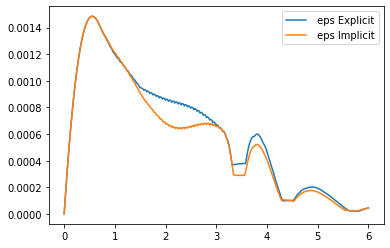

In [8]:
met_3T2P = Three_point_second_order(a, b, c, d, f)

ex_U32_appr = met_3T2P.Explicit(alph_0, alph_l, beta_0, beta_l, gamma_0, gamma_l, Psi_1, Psi_2, l, T = 6)
ex_U32_real = met_3T2P.Get_real_vals(solution, ex_U32_appr)
ex_eps32 = met_3T2P.Get_epx(ex_U32_appr, ex_U32_real)

im_U32_appr = met_3T2P.Implicit(alph_0, alph_l, beta_0, beta_l, gamma_0, gamma_l, Psi_1, Psi_2, l, T = 6)
im_U32_real = met_3T2P.Get_real_vals(solution, im_U32_appr)
im_eps32 = met_3T2P.Get_epx(im_U32_appr, im_U32_real)


data = []  
data.append([[[met_3T2P.tau * i for i in range(len(ex_U32_appr))], ex_eps32, f' eps'], f'Explicit'])
data.append([[[met_3T2P.tau * i for i in range(len(im_U32_appr))], im_eps32, f' eps'], f'Implicit'])

Plot(len(data), data)

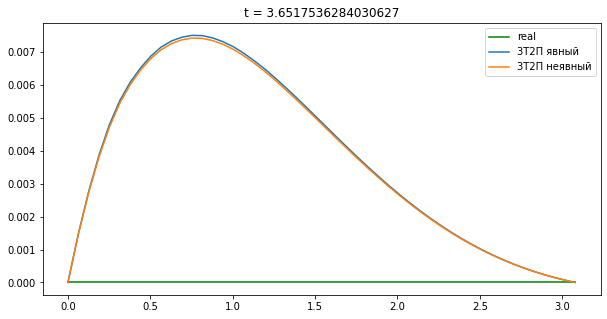

In [20]:
%matplotlib inline

U_real = [ex_U32_real, im_U32_real]
U_appr = [ex_U32_appr, im_U32_appr]


# def plot_met_3_2(i=0):
#     fig = plt.figure()
#     ax = fig.add_subplot(1, 1, 1)
#     fig.set_figwidth(10)
#     fig.set_figheight(5)

#     colors = sns.color_palette("tab10")
#     labls = ['явный', 'неявный']
    
#     ax.plot(met_3T2P.x, U_real[0][0], 'g', label = 'real');
    
#     for j in range(2 if len(U_real) > 2 else len(U_real)):
#         ax.plot(met_3T2P.x, U_appr[j][i], label = '3Т2П ' + labls[j], color = colors[j % len(colors)]);
#         ax.set_title(f"t = {met_3T2P.tau * i}")
#         ax.legend()


#     plt.show();
    
# interact(plot_met_3_2, i = (0, len(U_appr[0]) - 100, 100));
i = 3700
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_figwidth(10)
fig.set_figheight(5)

colors = sns.color_palette("tab10")
labls = ['явный', 'неявный']

ax.plot(met_3T2P.x, U_real[0][0], 'g', label = 'real');

for j in range(2 if len(U_real) > 2 else len(U_real)):
    ax.plot(met_3T2P.x, U_appr[j][i], label = '3Т2П ' + labls[j], color = colors[j % len(colors)]);
    ax.set_title(f"t = {met_3T2P.tau * i}")
    ax.legend()


plt.show();

# 2Т2П

In [10]:
class Two_point_second_order:
    def __init__(self, a, b, c, d, f, crnt = 1/4):
        self.a = a
        self.b = b
        self.c = c
        self.d = d
        self.f = f
        self.crnt = crnt
    
    def Explicit(self, alph_0, alph_l, beta_0, beta_l, gamma_0, gamma_l, Psi_1, Psi_2, l, T = 4, n = 50):
        h = l / n
        tau =  self.crnt * h**2 / self.a
        self.tau = tau
        x = np.arange(0, l, h)
        self.x = x

        u_0 = [Psi_1(x) for x in x]
        u_1 = [Psi_2(x) * tau + Psi_1(x) for x in x]
        _U = [u_0, u_1]
        t = tau

        A0 = 1 - h**2 * self.c / (2 * self.a) + h**2 / (2 * tau * self.a)
        A1 = - h**2 / (2 * tau * self.a)
        A2 = 0
        A3 = h**2 * self.b / (2 * self.a) - h

        B0 = A0
        B1 = A1
        B2 = 0
        B3 = h**2 * self.b / (2 * self.a) + h

        while (t < T):
            t += tau
            _u = np.zeros(len(u_0))
            u_k = _U[-1]
            u_pred_k = _U[-2]
            for i in range(1, len(_u) - 1):
                right_part = self.a*self.a * (u_k[i + 1] - 2 * u_k[i] + u_k[i - 1]) / (h * h) + self.b * (u_k[i + 1] - u_k[i - 1]) / (2 * h) + self.c * u_k[i]
                _u[i] = (right_part * 2 * tau**2 + u_pred_k[i] * (self.d * tau - 2) + 4 * u_k[i]) / (2 + self.d * tau)
            _u[0] = (gamma_0(t) * A3 + alph_0 * _u[1] - alph_0 * (A1 * _U[-1][0] + A2) ) / (A3 * beta_0 + alph_0 * A0)
            _u[-1] = (gamma_l(t) * B3 + alph_l * _u[-2] - alph_l * (B1 * _U[-1][-1] + B2) ) / (B3 * beta_l + alph_l * B0)
            _U.append(_u)

        return _U
    
    def Implicit(self, alph_0, alph_l, beta_0, beta_l, gamma_0, gamma_l, Psi_1, Psi_2, l, T = 4, n = 50):
        h = l / n
        tau =  self.crnt * h**2 / self.a
        self.tau = tau
        x = np.arange(0, l, h)
        self.x = x

        u_0 = [Psi_1(x) for x in x]
        u_1 = [Psi_2(x) * tau + Psi_1(x) for x in x]

        _U = [u_0, u_1]
        t = tau

        A0 = 1 - h**2 * self.c / (2 * self.a) + h**2 / (2 * tau * self.a)
        A1 = - h**2 / (2 * tau * self.a)
        A2 = 0
        A3 = h**2 * self.b / (2 * self.a) - h

        B0 = A0
        B1 = A1
        B2 = 0
        B3 = h**2 * self.b / (2 * self.a) + h

        while (t < T):
            t += tau

            A = np.zeros((n, n))
            d = np.zeros(n)     

            i = 0
            for row in A[1:-1]:
                row[i] = self.a**2 * 2 * tau**2 -  self.b * h * tau**2
                row[i + 1] = -4 * self.a**2 * tau**2 + self.c * 2 * tau**2 * h**2 - 2 * h**2 - self.d * tau * h**2
                row[i + 2] = self.a**2 * 2 * tau**2 + self.b * h * tau**2
                i += 1

                d[i] = 2 * h**2 * (_U[-2][i] - 2 * _U[-1][i]) + self.d * tau * h**2 * (-_U[-2][i])
                
            A[0][0] = alph_0 * A0 / A3 + beta_0
            A[0][1] = - alph_0 / A3
            d[0] = gamma_0(t) - alph_0 * (A1 * _U[-1][0] + A2) / A3
            
            A[-1][-2] = - alph_l /  B3
            A[-1][-1] = alph_l * B0 / B3 + beta_l
            d[-1] = gamma_l(t) - alph_l * (B1 * _U[-1][-1] + B2) / B3

            tr = Tridiagonal_Matrix_Algorithm(A, d)
            u = tr.Ans()
            _U.append(u)
        return _U


    def Get_real_vals(self, f, appr_U):
        U = []
        for i, u_appr in enumerate(appr_U):
            U.append([f(_x, self.tau * i) for _x in self.x])
        return U

    def Get_epx(self, U_appr, U_real):
        eps = [max(abs(np.array(U_real[i]) - np.array(U_appr[i]))) for i in range(len(U_appr))]
        return eps


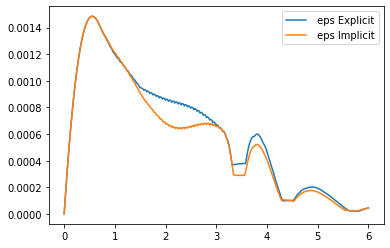

In [11]:
met_2T2P = Two_point_second_order(a, b, c, d, f)

ex_U22_appr = met_2T2P.Explicit(alph_0, alph_l, beta_0, beta_l, gamma_0, gamma_l, Psi_1, Psi_2, l, T = 6)
ex_U22_real = met_2T2P.Get_real_vals(solution, ex_U22_appr)
ex_eps22 = met_2T2P.Get_epx(ex_U22_appr, ex_U22_real)

im_U22_appr = met_2T2P.Implicit(alph_0, alph_l, beta_0, beta_l, gamma_0, gamma_l, Psi_1, Psi_2, l, T = 6)
im_U22_real = met_2T2P.Get_real_vals(solution, im_U22_appr)
im_eps22 = met_2T2P.Get_epx(im_U22_appr, im_U22_real)



data = []  
data.append([[[met_2T2P.tau * i for i in range(len(ex_U22_appr))], ex_eps22, f' eps'], f'Explicit'])
data.append([[[met_2T2P.tau * i for i in range(len(im_U22_appr))], im_eps22, f' eps'], f'Implicit'])

Plot(len(data), data)

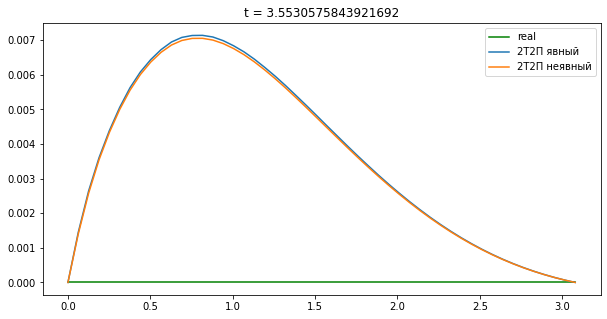

In [21]:
%matplotlib inline

U_real = [ex_U22_real, im_U22_real]
U_appr = [ex_U22_appr, im_U22_appr]


# def plot_met_2_2(i=0):
#     fig = plt.figure()
#     ax = fig.add_subplot(1, 1, 1)
#     fig.set_figwidth(10)
#     fig.set_figheight(5)

#     colors = sns.color_palette("tab10")
#     labls = ['явный', 'неявный']
    
#     ax.plot(met_2T2P.x, U_real[0][0], 'g', label = 'real');
    
#     for j in range(2 if len(U_real) > 2 else len(U_real)):
#         ax.plot(met_2T2P.x, U_appr[j][i], label = '2Т2П ' + labls[j], color = colors[j % len(colors)]);
#         ax.set_title(f"t = {met_2T2P.tau * i}")
#         ax.legend()


#     plt.show()
    
# interact(plot_met_2_2, i = (0, len(U_appr[0]) - 100, 100));
i = 3600
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_figwidth(10)
fig.set_figheight(5)

colors = sns.color_palette("tab10")
labls = ['явный', 'неявный']

ax.plot(met_2T2P.x, U_real[0][0], 'g', label = 'real');

for j in range(2 if len(U_real) > 2 else len(U_real)):
    ax.plot(met_2T2P.x, U_appr[j][i], label = '2Т2П ' + labls[j], color = colors[j % len(colors)]);
    ax.set_title(f"t = {met_2T2P.tau * i}")
    ax.legend()


plt.show()

In [ ]:
%matplotlib inline

U_real = [[ex_U22_real, '2Т2П '], [im_U22_real, '2Т2П ']]
U_appr = [[ex_U21_appr, '2Т1П явный'],  [im_U21_appr, '2Т1П неявный'], [ex_U32_appr, '3Т2П явный'], [im_U32_appr, '3Т2П неявный'], [ex_U22_appr, '2Т2П явный'], [im_U22_appr, '2Т2П неявный']]
# 

def plot_met(i=0):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.set_figwidth(10)
    fig.set_figheight(5)

    colors = sns.color_palette("tab10")
    labls = ['явный', 'неявный']
    
    ax.plot(met_2T2P.x, U_real[0][0][0], color = colors[len(colors) - 1], label = 'real');
    for j in range(len(U_appr)):
        ax.plot(met_2T2P.x, U_appr[j][0][i], label = U_appr[j][1], color = colors[j % (len(colors) - 1)]);
        ax.set_title(f"t = {met_2T2P.tau * i}")
        ax.legend()


    plt.show();
    
interact(plot_met, i = (0, len(U_appr[0][0]) - 100, 100));